In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import urllib.request
from scipy import signal
import numpy.polynomial.polynomial as poly
import soundfile as sf
import IPython
import warnings
warnings.filterwarnings('ignore')
from IPython.display import Audio

#  Defter 1 konu sonu egzersizleri

**Egzersiz 1:**

Pencere fonksiyonlarını ele alırken üçgen pencere (İng: triangular window) ve kutu pencere (İng: rectangular window) fonksiyonlarını ele almıştık. Bu iki pencerenin bileşimi bir pencere tanımlamak istiyoruz, öyle ki üçgene yakınlık düzeyi $\alpha$ (*alfa*) parametresiyle kontrol edilebilsin. $alfa=1$ için pencere üçgen pencereye eşit olmalı, $alfa=0$ için kutu pencereye eşit olmalı ve bu değerler arasında bir değer aldığında pencerenin sol ve sağ uçları üçgen (çıkış ve iniş) ve ortası kutu pencereden gelecek şekilde oluşturulmalıdır. Fonksiyon tanımının altında çeşitli parametre kombinasyonları için elde edilen pencere fonksiyonları çizdirilmektedir. Şekli inceleyiniz ve kısmen yazılmış *ucgen_kutu_pencere()* fonksiyonunu kod çalıştırıldığında aynı şekiller elde edilecek şekilde tamamlayınız. Bu soru için scipy kütüphanesini kullanmayınız.

Beklenen çıktı


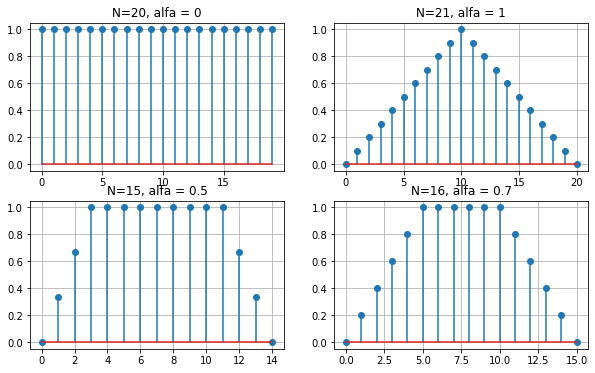

In [ ]:
def ucgen_kutu_pencere(N, alfa):
  # kodunuz burada başlıyor
  yari_N = int(N // 2)
  ucgen_N = int(yari_N * alfa)
  sol_cikis = np.linspace(0,1,num=ucgen_N, endpoint=False)
  sol_duzluk = np.ones((yari_N-ucgen_N,))
  sol_yarim = np.concatenate((sol_cikis, sol_duzluk))
  if N%2 == 0:
    return np.concatenate((sol_yarim, sol_yarim[::-1]))
  else:
    return np.concatenate((sol_yarim, np.array([1]), sol_yarim[::-1]))
  # kodunuz burada bitiyor
  pass

# Fonksiyonun kullanımı: kodun bu kısmını değiştirmeyiniz
plt.figure(figsize=(10,6))
plt.subplot(2,2,1)
plt.stem(ucgen_kutu_pencere(N=20, alfa=0));plt.grid();plt.title('N=20, alfa = 0');
plt.subplot(2,2,2)
plt.stem(ucgen_kutu_pencere(N=21, alfa=1));plt.grid();plt.title('N=21, alfa = 1');
plt.subplot(2,2,3)
plt.stem(ucgen_kutu_pencere(N=15, alfa=0.5));plt.grid();plt.title('N=15, alfa = 0.5');
plt.subplot(2,2,4)
plt.stem(ucgen_kutu_pencere(N=16, alfa=0.7));plt.grid();plt.title('N=16, alfa = 0.7');
print('Beklenen çıktı')

**Egzersiz 2:**

$x[n] = Reel{((0.9 e^{j\pi/4})^n)}$ sinyalinin örnek sayısı cinsinden periyodunu bulmanız istenmiştir. Sinyali olşturup birkaç periyod çizdiren bir kod parçası yazınız ve periyodu bulup aşağıdaki ... yerine yazınız:

T0 = ... örnek

Text(0, 0.5, 'Sinyal genlik')

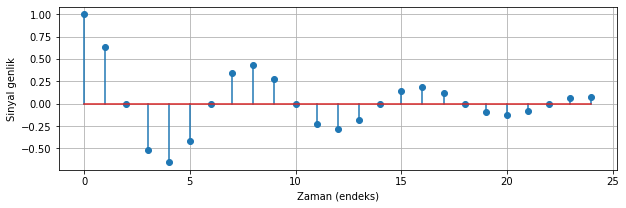

In [ ]:
# kodunuzu buraya yazınız
alfa = 0.9 * np.exp(1j*np.pi/4)
N = 25
n = np.arange(N)
x_n = np.real(np.power(alfa,n))
plt.figure(figsize=(10,3))
plt.stem(n, x_n); plt.grid();plt.xlabel('Zaman (endeks)');plt.ylabel('Sinyal genlik')

Gözlemle periyodun 8 örnek olduğunu doğrulabiliyoruz. Şu şekilde de bulabilirdik:

$x[n] = x[n + N], N = ?$

$e^{j(\pi/4) n} = e^{j(\pi/4) (n+N)}$

$e^{j(\pi/4) n} e^{j(k2\pi)} = e^{j(\pi/4) n} e^{j(\pi/4) N}, k$ tamsayı

$k2\pi = (\pi/4) N$

$k = 1$ için $N = 8$

**Egzersiz 3:**

1000 örnekleme frekansında 0.1 saniye uzunluğunda aşağıdaki sürekli zamanda tanımlanmış sinyalin örneklenmiş halini oluşturan ve çizdiren bir kod parçası yazınız. 

\begin{equation*}
x(t) = sin(2\pi10t) + sin(2\pi400t) 
\end{equation*}

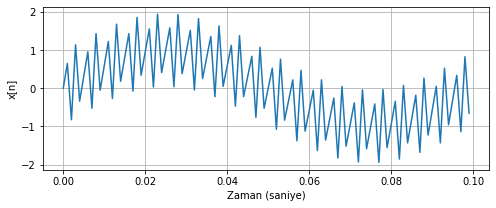

In [ ]:
# kodunuzu buraya yazınız
ornekleme_frekansi = 1000
t = np.arange(0,0.1,1/ornekleme_frekansi)
x = np.sin(2*np.pi*10*t) + np.sin(2*np.pi*400*t)
fig = plt.figure(figsize=(8,3));
plt.plot(t, x);plt.xlabel('Zaman (saniye)'); plt.ylabel('x[n]');plt.grid();

**Egzersiz 4:**

Aşağıda bir ses sinyali *konusma_sinyali* isimli diziye okunmaktadır. Sinyalin 0.1 saniye ve 1.1 saniye arasındaki kısmını *x_n* isimli yeni bir diziye üçgen pencere ile pencerelenmiş olarak kopyalayan bir kod parçası yazınız. Üçgen pencere fonksiyonu hazır fonksiyonla yaratabilirsiniz: signal.get_window('triang', uzunluk)

In [ ]:
link = 'https://github.com/MTG/sms-tools/raw/master/sounds/speech-male.wav'
dosya_ismi = link.split('/')[-1]
urllib.request.urlretrieve(link, dosya_ismi)

konusma_sinyali, ornekleme_fr = sf.read(dosya_ismi)
basla = 0.1; bitis = 1.1
x_n = konusma_sinyali[int(ornekleme_fr * basla):int(ornekleme_fr * bitis)]
x_n = x_n * signal.get_window('triang', x_n.size)

Audio(x_n, rate=ornekleme_fr)

#  Defter 2 konu sonu egzersizleri

**Egzersiz 5:**

$y[n] = 0.8 x[n] - 0.3 x[n-1] + 0.1 x[n-2]$ sistemini gerçeklemek istiyorsunuz. Bu amaçla, giriş sinyalini sistemin dürtü cevabı ile  konvolüsyona tabi tutarak gerçekleştiren bir fonksiyon yazınız. 

Text(0.5, 1.0, 'y[n]')

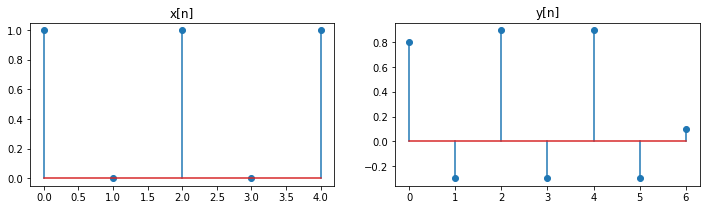

In [ ]:
# Dürtü cevabı kullanarak sistem gerçekleme
def egzersiz5_fonksiyon(x_n):
  # kodunuz burada başlıyor
  # Dürtü cevabının oluşturulması
  h_n = np.array([0.8, -0.3, 0.1])
  # Konvolüsyon ile hesaplama
  return np.convolve(x_n, h_n)
  # kodunuz burada bitiyor
  pass

# Sistemin keyfi seçilmiş bir sinyal ile test edilmesi
x_n = np.array([1,0,1,0,1])
y_n = egzersiz5_fonksiyon(x_n)
plt.figure(figsize=(12,3))
plt.subplot(1,2,1);plt.stem(x_n);plt.title('x[n]')
plt.subplot(1,2,2);plt.stem(y_n);plt.title('y[n]')

**Egzersiz 6:**

Bir hareketli ortalama sistemi şu şekilde tanımlanmıştır:

\begin{equation}
y[n] = \frac{1}{2M+1} \sum_{k = -M}^{M} x[n-k]
\end{equation}

$M$'in farklı değerleri için ([5, 15, 25]) sistemin genlik spektrumunun nasıl değiştiğini gözlemek istiyoruz. Bunu için bir kod parçası yazınız. 

Text(0, 0.5, '|H(w)| dB')

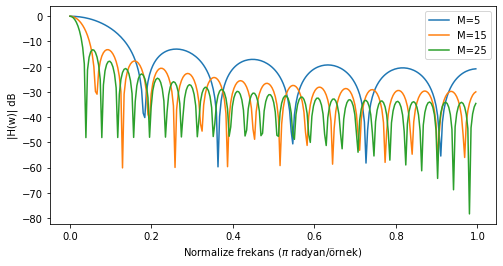

In [ ]:
h_n_uzunluk = 80 # en büyük 2M değerinden daha büyük seçildi
fft_N = 512; yarim_fft_N = int(fft_N/2)
f_ax = np.arange(yarim_fft_N)/yarim_fft_N

plt.figure(figsize=(8,4))
for M in [5, 15, 25]:
  h_n = np.zeros((h_n_uzunluk,)); h_n[:(2*M+1)] = 1 / (2*M+1)
  H_w = np.fft.fft(h_n, fft_N)
  H_w_abs = 20*np.log10(np.abs(H_w[:yarim_fft_N]))
  plt.plot(f_ax, H_w_abs, label='M={}'.format(M))
plt.legend();
plt.xlabel('Normalize frekans ($\pi$ radyan/örnek)')
plt.ylabel('|H(w)| dB')

**Egzersiz 7:**

\begin{equation}
H(e^{j\omega}) = \frac{1-0.25e^{-j\omega}+0.15e^{-2j\omega}}{1-0.5e^{-j\omega}-0.2e^{-2j\omega}}
\end{equation}
sisteminin genlik frekans cevabını çizdiren bir kod parçası yazınız.

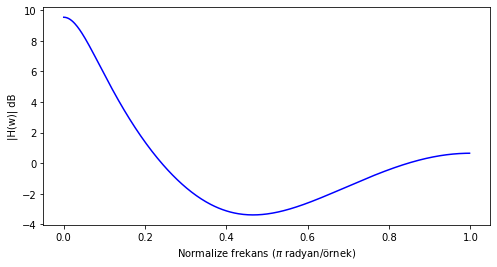

In [ ]:
b = [1, -0.25, 0.15]
a = [1, -0.5, -0.2]
w, h = signal.freqz(b, a)
plt.figure(figsize=(8,4))
plt.plot(w/np.pi, 20 * np.log10(abs(h)), 'b');
plt.xlabel('Normalize frekans ($\pi$ radyan/örnek)');
plt.ylabel('|H(w)| dB');

**Egzersiz 8:** 

Aşağıdaki denklem ile tanımlanmış sistemin frekans cevabını çizdiren bir kod parçası yazınız:

$y[n]-0.5y[n-1]-0.2y[n-2]=x[n]-0.25x[n-1]+0.15x[n-2]$

In [ ]:
# Cevap yukarıdaki ile aynı

**Egzersiz 9:** 

\begin{equation}
y[n] = x[n] - 0.25 x[n-1]
\end{equation}

denklemiyle tanımlanan sistemin ve bu sistemin tersi olan sistemin genlik frekans cevabını aynı figürde çizdiren bir kod parçası yazınız.

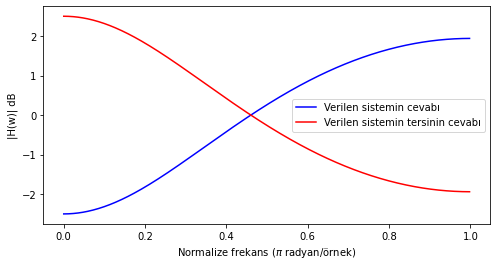

In [ ]:
# Kodunuzu buraya yazınız
# sistemin kendisi
b = [1, -0.25]; a = [1]
w, h = signal.freqz(b, a)
plt.figure(figsize=(8,4))
plt.plot(w/np.pi, 20 * np.log10(abs(h)), 'b', label='Verilen sistemin cevabı');
w, h = signal.freqz(a, b)
plt.plot(w/np.pi, 20 * np.log10(abs(h)), 'r', label='Verilen sistemin tersinin cevabı');
plt.legend();
plt.xlabel('Normalize frekans ($\pi$ radyan/örnek)');
plt.ylabel('|H(w)| dB');

#  Defter 3 konu sonu egzersizleri

**Egzersiz 10:**

Aşağıda bir sayısal sistemin z-transformu verilmiştir. Sistem nedenseldir ('causal'). **Bu sistem için aşağıdaki sorular verilmiştir. Python kodu ile gerekli analiz ve çizimleri yaptırarak ve metin kutusuna yorum yazarak cevaplayınız**


*   **a)** Z-tranform kutup ve sıfırlarını buldurup z-uzayında çizdiriniz. 
*   **b)** Sistemin frekans cevabını çizdiriniz 
*   **c)** Kutupların açısından yola çıkarak filtredeki rezonansların merkezi frekanslarını bulunuz. 
*   **d)** Bu sisteme girdi olarak bir x[n] oluşturunuz. Bu x[n] 1000 Hz örnekleme frekansında örneklenmeli, 0.1 saniye uzunluğunda ve iki sinüs dalgasının toplamı şeklinde olmalı. Bu iki sinüsün frekanslarını öyle seçin ki sistem sinüslerden birinin genliğini yükseltirken diğerininkini azaltsın. Frekans seçimini nasıl yaptığınızı sistemin frekans cevabı ile ilişkilendirerek açıklayınız. Giriş sinyalini filtreden geçirerek çıkış sinyali oluşturunuz.Giriş ve çıkış sinyallerini çizdiriniz. Sonucu yorumlayınız: hangi bileşenin genliği artıp hangisininki azaldı, neden?





\begin{equation}
H(z) = \frac{1}{1 - 1.34350288 z^{-1} + 0.9025 z^{-2} }
\end{equation}

In [ ]:
# Kutuplar ve sıfırları z-uzayında görselleştirme fonksiyonu
def z_uzayi_cizdir(kutuplar, sifirlar):
  plt.figure(figsize=(4, 4))
  # Birim çember çizimi
  t = np.linspace(0,2*np.pi, 100)
  plt.plot(np.cos(t), np.sin(t), 'k')

  # Eksen doğrularının çizimi
  plt.plot([0,0], [-1,1], 'k', linewidth=0.5)
  plt.plot([-1,1], [0,0], 'k', linewidth=0.5)

  # Sıfır ve kutupların çizimi
  for kutup in kutuplar:
    plt.plot(kutup.real, kutup.imag, 'x', markersize=10, color='red')
  for sifir in sifirlar:
    plt.plot(sifir.real, sifir.imag, 'o', markersize=10, color='red')

  plt.text(-0.95, 0.95, 'z uzayı', fontsize=14)
  plt.text(-0.8, -0.07, 'gerçek', fontsize=13)
  plt.text(-0.15, 1.03, 'sanal', fontsize=13)
  plt.grid();

# scipy.signal.freqz kullanarak frekans cevabı çizdirme fonksiyonu
def frekans_cevabi_cizdir(b, a):
  # a ve b polinomları verilen bir sistemin frekans cevabının hesaplanması
  w, h = signal.freqz(b, a) # w frekans değerlerini, h ise H(e^jw) degerlerini içeriyor
  # frekans eksenini normalize edelim, bu karşılaştırmalarımızı kolaylaştıracak
  w /= np.pi 

  fig, ax1 = plt.subplots()
  ax1.set_title('Filtre frekans cevabı')
  ax1.plot(w, 20*np.log10(abs(h)), 'b')
  ax1.set_ylabel('Genlik [dB]', color='b')
  ax1.set_xlabel('Normalize frekans [$\pi$ radyan/örnek]')
  ax2 = ax1.twinx()
  angles = np.unwrap(np.angle(h))
  ax2.plot(w, angles, 'g')
  ax2.set_ylabel('Açı (radyan)', color='g')
  ax2.grid()
  ax2.axis('tight')
  plt.show()

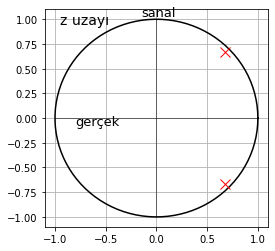

In [ ]:
#Cevap 10-a)
#H(z)nin polinomlarının tanımlanması
a = [1, -1.34350288, 0.9025]
b = [1]
#Köklerin bulunması
kutuplar = np.roots(a)
sifirlar = []

z_uzayi_cizdir(kutuplar, sifirlar)

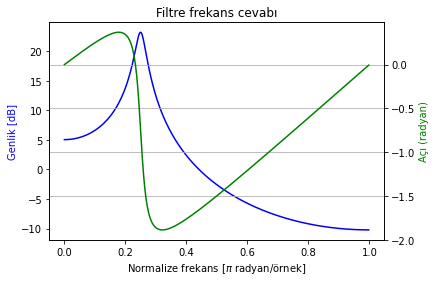

In [ ]:
#Cevap 10-b) sistemin frekans cevabı
frekans_cevabi_cizdir(b, a)

In [ ]:
#Cevap 10-c) filtrenin rezonans frekansının bulunması
thetas = np.angle(kutuplar)
pozitif_kutup_acilari = thetas[thetas > 0]
print('Rezonans frekansları:', pozitif_kutup_acilari, 'radyan/örnek')

Rezonans frekansları: [0.78539817] radyan/örnek


Rezonans merkezi frekansı: [125.0000005] Hz


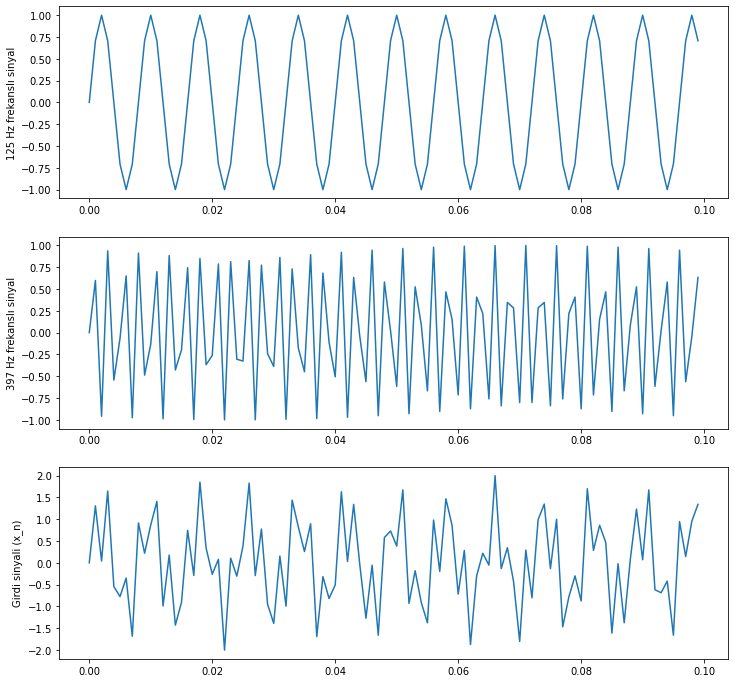

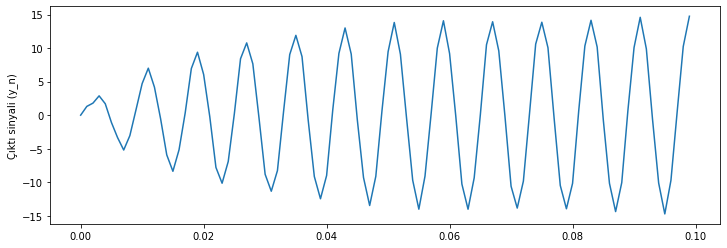

In [ ]:
#Cevap 10-d) Girdi sinyali oluşturularak filtrelenmesi
# Örnekleme frekansı 1000 Hz radyan cinsinden 2*pi/örnek açısal frekansına karşılık gelmektedir
# Örnekleme frekansının yarısı (0-500Hz) pozitif spektrum aralığımıza denk gelir: 0 - pi radyan/örnek
# Doğrusal ilişki ile, 1000 Hz 2pi'ye denk geliyor ise,  
#   0.78539817 radyan/örnek hangi frekansa(Hz) denk geliyor bulabiliriz
ornekleme_fr = 1000
rezonans_frekansi = pozitif_kutup_acilari * ornekleme_fr / (2*np.pi)
print('Rezonans merkezi frekansı:', rezonans_frekansi, 'Hz')
#Sistemin frekans cevabını incelediğimizde yüksek frekansta (örnek 2.5 radyan/örnek)
# genlik spektrum değerlerinin düşük olduğunu görebiliyoruz. Bu frekanslar filtre
# tarafından baskılanacaktır. Bunu ikinci bileşenin frekansı olarak seçebilirim
w_bastirilacak = 2.5
frekans_bastirilacak = w_bastirilacak * ornekleme_fr / (2*np.pi)

#Sinyalin bu iki bileşenden oluşturulması ve çizdirilmesi:
t = np.arange(0,0.1, 1/ ornekleme_fr)
signal_1 = np.sin(2*np.pi*rezonans_frekansi*t)
signal_2 = np.sin(2*np.pi*frekans_bastirilacak*t)
x_n = signal_1 + signal_2
plt.figure(figsize=(12,12))
plt.subplot(3,1,1)
plt.plot(t, signal_1);plt.ylabel('{} Hz frekanslı sinyal'.format(int(rezonans_frekansi)))
plt.subplot(3,1,2)
plt.plot(t, signal_2);plt.ylabel('{} Hz frekanslı sinyal'.format(int(frekans_bastirilacak)))
plt.subplot(3,1,3)
plt.plot(t, x_n);plt.ylabel('Girdi sinyali (x_n)')

y_n = signal.lfilter(b, a, x_n)
plt.figure(figsize=(12,4))
plt.plot(t, y_n);plt.ylabel('Çıktı sinyali (y_n)');

**Cevap 10 d-devam:** 125 Hz'deki bileşenin genliği arttı, 397Hz'deki bileşenin genliği azaldı. Filtre beklenildiği gibi rezonans frekanındaki bileşeni yükseltti, diğerini azalttı

#  Defter 4 konu sonu egzersizleri

**Ezgersiz 11:**

Aşağıda bir dosyadan 10000 Hz örnekleme frekansında bir harmonik sinyal okunmaktadır. Frekans uzayında filtreleme işlemi için sinyalin spektrumunu hesaplayan, ardından spektrumda ilgili bölgeleri değiştiren ve çıktı sinyalini ters Fourier dönüşümü ile elde eden bir fonksiyon tanımlayınız. Bu fonksiyonu, sinyalde 2000 Hz - 3000 Hz arasındaki bileşenlerin genliklerini sıfırlamak için kullanınız. Yaptığınız işlemin sonucu kontrol amacıyla, girdi sinyali ve çıktı sinyalinin genlik spektrumunu üstüste çizdiren bir kod parçası yazınız. 

In [ ]:
# Test sinyali: Sentetik harmonik sinyal 
url = 'https://raw.githubusercontent.com/barisbozkurt/dataDumpForCourses/master/harmonic_signal.txt'
urllib.request.urlretrieve(url,'harmonic_signal.txt')
test_sinyali_1 = np.loadtxt('harmonic_signal.txt')
test_sinyali_1_ornekleme_fr = 10000 # Örnekleme frekansı Hz

In [ ]:
def frekans_uzayinda_filtrele(x_n, dusuk_kesim_fr, yuksek_kesim_fr, ornekleme_fr, carpan):
  ornek_sayisi = x_n.size
  dusuk_kesim_endeks = int(dusuk_kesim_fr * ornek_sayisi / ornekleme_fr)
  yuksek_kesim_endeks = int(yuksek_kesim_fr * ornek_sayisi / ornekleme_fr)
  X_w = np.fft.fft(x_n)
  # Spektrumda değiştirme işlemi
  X_w[dusuk_kesim_endeks:yuksek_kesim_endeks] *= carpan
  # Simektrik kısımdaki işlem
  X_w[-yuksek_kesim_endeks:-dusuk_kesim_endeks] *= carpan
  y_n = np.real(np.fft.ifft(X_w, ornek_sayisi))
  return y_n

# Tanımlanan fonksiyonun kullanılması
dusuk_kesim_fr = 2000; yuksek_kesim_fr = 3000; 
carpan = 0
test_sinyali_1_filtrelenmis = frekans_uzayinda_filtrele(test_sinyali_1, dusuk_kesim_fr, yuksek_kesim_fr, test_sinyali_1_ornekleme_fr, carpan)

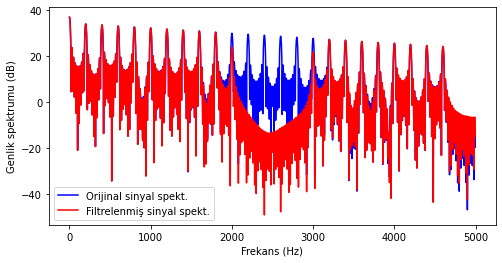

In [ ]:
# Spektrumların üstüste çizdirilmesi
fft_N = 4096; yarim_fft_N = int(fft_N/2)
frekans_ax = np.arange(yarim_fft_N) * test_sinyali_1_ornekleme_fr / fft_N
plt.figure(figsize=(8,4))
genlik_spek_x = 20 * np.log10(abs(np.fft.fft(test_sinyali_1, fft_N)[:yarim_fft_N]))
plt.plot(frekans_ax, genlik_spek_x, 'b', label='Orijinal sinyal spekt.');
genlik_spek_y = 20 * np.log10(abs(np.fft.fft(test_sinyali_1_filtrelenmis, fft_N)[:yarim_fft_N]))
plt.plot(frekans_ax, genlik_spek_y, 'r', label='Filtrelenmiş sinyal spekt.');
plt.legend();
plt.xlabel('Frekans (Hz)');
plt.ylabel('Genlik spektrumu (dB)');